<a href="https://colab.research.google.com/github/Zakharov1977/data_science/blob/main/HW_Analytic_Zakharov_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import glob
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import pylab
from scipy.stats import t

In [3]:
sp_data = pd.read_csv('community_dataset.csv')

In [ ]:
sp_data.head(100)

In [ ]:
sp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269442 entries, 0 to 269441
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   distance_to_vasculature   269442 non-null  float64
 1   distance_to_largest_cell  269442 non-null  float64
 2   immune_marker_1           269442 non-null  float64
 3   immune_marker_2           269442 non-null  float64
 4   cell_interaction          269442 non-null  object 
 5   cell_type                 269442 non-null  object 
 6   case_id                   269442 non-null  int64  
 7   area_of_cell              269442 non-null  int64  
 8   age_group                 269442 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 18.5+ MB


In [ ]:
sp_data.nunique()

distance_to_vasculature     269442
distance_to_largest_cell    269442
immune_marker_1             236122
immune_marker_2             209512
cell_interaction                 6
cell_type                        8
case_id                          8
area_of_cell                  1391
age_group                        2
dtype: int64

In [ ]:
uniques = pd.unique(sp_data[['cell_type']]. values.ravel ())
pd.DataFrame(uniques)

,0
0,Stroma cells
1,Unclassified
2,Immune type 2
3,Blood cells
4,Bone cells
5,Largest cells
6,Immune type 1
7,Vasculature


In [ ]:
# оцениваем наличие пропусков данных
display(sp_data.isna().sum())

distance_to_vasculature     0
distance_to_largest_cell    0
immune_marker_1             0
immune_marker_2             0
cell_interaction            0
cell_type                   0
case_id                     0
area_of_cell                0
age_group                   0
dtype: int64

1) Есть ли стат-значимость между типом клетки и:

а) Размером клетки (area_of_cell), добавьте hue по возрастным группам.

В качестве ответов можно приводить box_plot/swarplot, где по одной оси будет тип клеток, а по другой — оцениваемая вами статистика.

In [4]:
# определяем количество возрастных групп
uniques = pd.unique(sp_data[['age_group']]. values.ravel ())
pd.DataFrame(uniques)

,0
0,elder_group
1,young_group


In [5]:
plt.rcParams['figure.dpi'] = 140

In [7]:
# изменяем тип данных на категориальные
sp_data[['cell_interaction', 'cell_type', 'age_group']] = sp_data[['cell_interaction', 'cell_type', 'age_group']].astype('category')
sp_data.dtypes

distance_to_vasculature      float64
distance_to_largest_cell     float64
immune_marker_1              float64
immune_marker_2              float64
cell_interaction            category
cell_type                   category
case_id                        int64
area_of_cell                   int64
age_group                   category
dtype: object

In [8]:
pip install statannotations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from statannotations.Annotator import Annotator
from itertools import combinations
     

x='cell_type'
y='area_of_cell'
     

order = sp_data[x].unique()
     

pairs = list(combinations(order, 2))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Stroma cells vs. Unclassified: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=6.687e+09
Unclassified vs. Immune type 2: Mann-Whitney-Wilcoxon test two-sided, P_val:4.687e-01 U_stat=5.445e+08
Immune type 2 vs. Blood cells: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.146e+07
Blood cells vs. Bone cells: Mann-Whitney-Wilcoxon test two-sided, P_val:2.182e-23 U_stat=4.166e+06
Bone cells vs. Largest cells: Mann-Whitney-Wilcoxon test two-sided, P_val:1.112e-90 U_stat=1.654e+06
Largest cells vs. Immune type 1: Mann-Whitney-Wilcoxon test two-sided, P_val:2.084e-222 U_stat=8.202e+06
Immune type 1 vs. Vasculature: Mann-Whitney-Wilcoxon test two-sided, P_val:1.452e-01 U_stat=4.299e+05
Stroma cells vs. Immune type 2: Mann-Whitney-Wilcoxon test two-sided, P_val:3.618e-251 U_stat=1.628e+09
U

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde7198af70>,
  <statannotations.Annotation.Annotation at 0x7fde7185e9a0>])

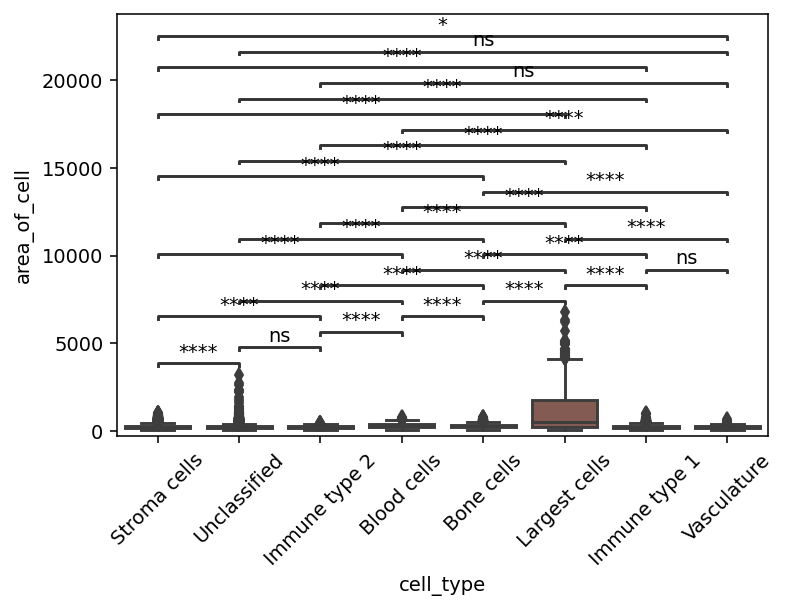

In [12]:
# используем тест Манна-Уитни, так как выборки независимые 
# и не нормального распределения
ax = sns.boxplot(data=sp_data, x=x, y=y, order=order)
plt.xticks(rotation=45)

annotator = Annotator(ax, pairs, data=sp_data, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

**Вывод: Есть статистически достоверные различия между по размеру между различнымими типами клеток. При этом не обнаруживается различий между стромальными и неклассифицируемым типом и между имуннымими клетками 2 типа и неклассифицируемыми клетками.**

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Bone cells_young_group vs. Bone cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:3.789e-03 U_stat=3.842e+05
Blood cells_young_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:8.017e-01 U_stat=6.026e+05
Immune type 1_young_group vs. Immune type 1_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:5.130e-04 U_stat=2.971e+06
Stroma cells_young_group vs. Stroma cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.673e-107 U_stat=3.119e+09
Unclassified_young_group vs. Unclassified_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:6.329e-13 U_stat=5.303e+08
Immune type 2_young_group vs. Immune type 2_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:3.074e-16 U_stat=3.025e+07
Largest cells_young_group vs. Largest cells_elder_group: Mann-Wh

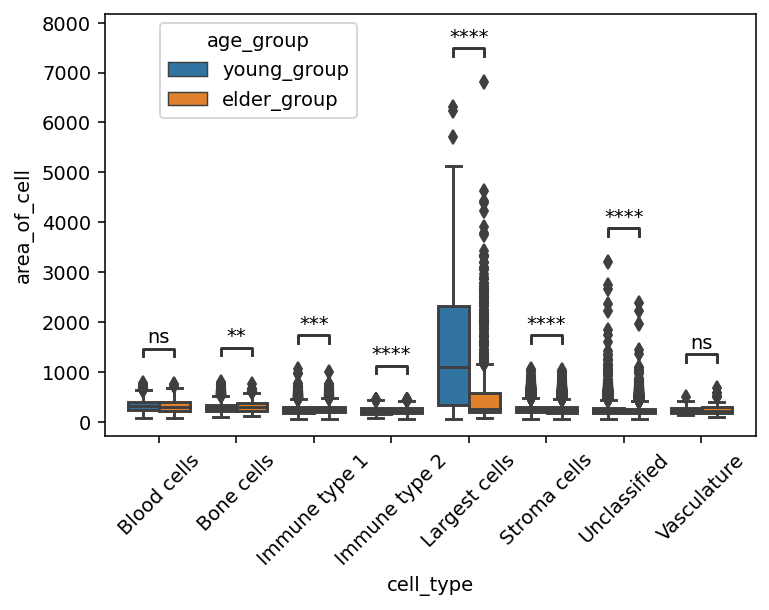

In [14]:
# определение различий между размером клеток в разных возрастных группах
x = 'cell_type'
y = 'area_of_cell'
hue = 'age_group'

hue_order = ['young_group', 'elder_group']

pairs = [((cell, 'young_group'), (cell, 'elder_group'))
                         for cell in sp_data[x].unique()]

ax = sns.boxplot(data=sp_data, x=x, y=y, hue=hue, hue_order=hue_order)
plt.xticks(rotation=45)

annotator = Annotator(ax, pairs, data=sp_data, x=x, y=y, 
                      hue_order=hue_order, hue=hue)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(0.07, 1), title=hue)

**Вывод: Еесть возрастные различия, за исключением клеток крови и сосудистых клеток.**

1) Есть ли стат-значимость между типом клетки и:

б) Экспрессией иммунных маркеров (immune_marker_1, immune_marker_2), добавьте hue по возрастным группам.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Stroma cells vs. Unclassified: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=5.194e+09
Unclassified vs. Immune type 2: Mann-Whitney-Wilcoxon test two-sided, P_val:3.070e-20 U_stat=5.173e+08
Immune type 2 vs. Blood cells: Mann-Whitney-Wilcoxon test two-sided, P_val:1.091e-01 U_stat=2.240e+07
Blood cells vs. Bone cells: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.118e+06
Bone cells vs. Largest cells: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=4.585e+06
Largest cells vs. Immune type 1: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.457e+06
Immune type 1 vs. Vasculature: Mann-Whitney-Wilcoxon test two-sided, P_val:9.764e-14 U_stat=2.558e+05
Stroma cells vs. Immune type 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.273e-238 U_stat=1.184e+09
Un

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde6f750640>,
  <statannotations.Annotation.Annotation at 0x7fde719554c0>])

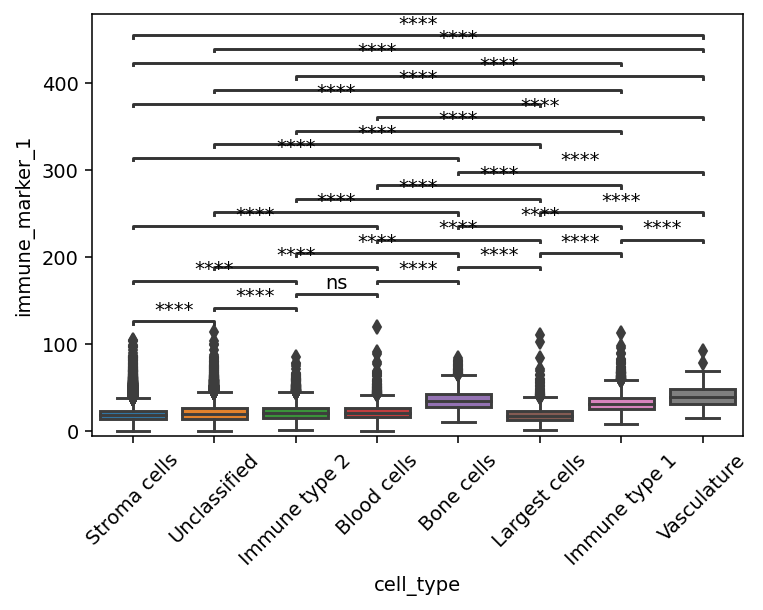

In [16]:
x='cell_type'
y='immune_marker_1'
     

order = sp_data[x].unique()
     

pairs = list(combinations(order, 2))
     

ax = sns.boxplot(data=sp_data, x=x, y=y, order=order)
plt.xticks(rotation=45)

annotator = Annotator(ax, pairs, data=sp_data, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

**Вывод: Экспрессия иммунных маркеров 1 типа отличаются по всех типах клеток, кроме клеток крови и иммунных клеток 2 типа.**

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Stroma cells vs. Unclassified: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=6.664e+09
Unclassified vs. Immune type 2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.199e-73 U_stat=5.921e+08
Immune type 2 vs. Blood cells: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=2.731e+06
Blood cells vs. Bone cells: Mann-Whitney-Wilcoxon test two-sided, P_val:3.185e-31 U_stat=2.940e+06
Bone cells vs. Largest cells: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=5.013e+06
Largest cells vs. Immune type 1: Mann-Whitney-Wilcoxon test two-sided, P_val:2.735e-227 U_stat=2.851e+06
Immune type 1 vs. Vasculature: Mann-Whitney-Wilcoxon test two-sided, P_val:1.763e-05 U_stat=4.854e+05
Stroma cells vs. Immune type 2: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.747e+09
Un

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde6e10f0d0>,
  <statannotations.Annotation.Annotation at 0x7fde6d44ce20>])

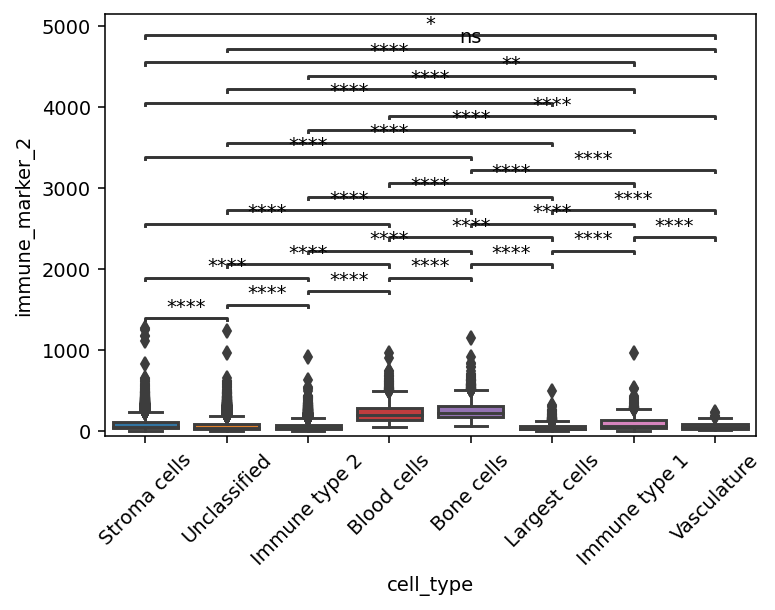

In [19]:
x='cell_type'
y='immune_marker_2'
     

ax = sns.boxplot(data=sp_data, x=x, y=y, order=order)
plt.xticks(rotation=45)

annotator = Annotator(ax, pairs, data=sp_data, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

**Вывод: Экспрессия имунных маркеров 2 типа отличается во всех типах кроме неклассифицируемых клеток и клеток сосудов.**

In [ ]:
# Оцениваем различия с учетом возрастных групп.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Bone cells_young_group vs. Bone cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.974e-17 U_stat=3.090e+05
Blood cells_young_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.806e-27 U_stat=4.163e+05
Immune type 1_young_group vs. Immune type 1_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:7.746e-126 U_stat=1.867e+06
Stroma cells_young_group vs. Stroma cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.867e+09
Unclassified_young_group vs. Unclassified_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=3.449e+08
Immune type 2_young_group vs. Immune type 2_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.147e+07
Largest cells_young_group vs. Largest cells_elder_group: Mann-Wh

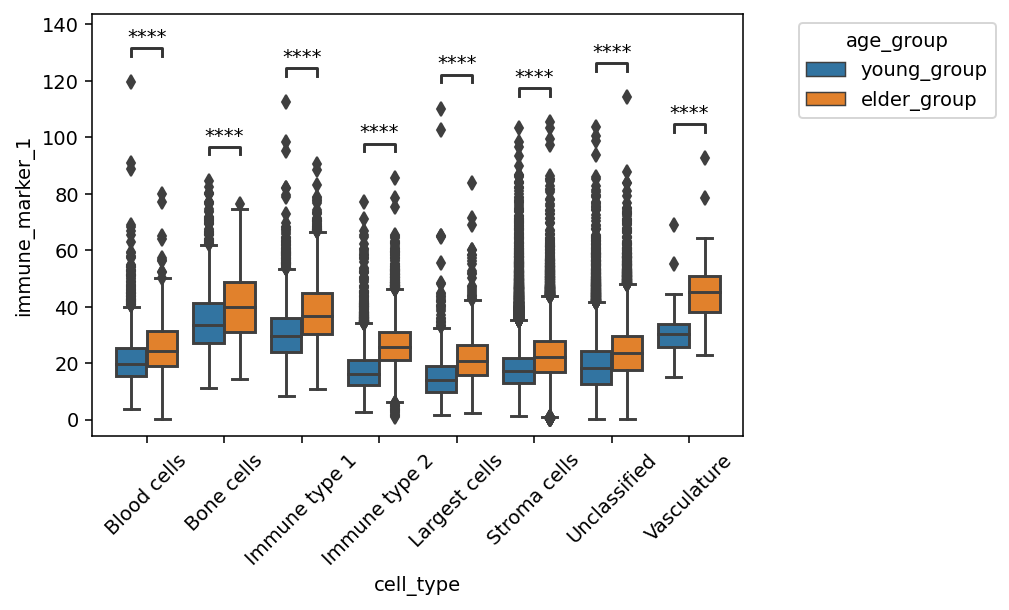

In [20]:
x = 'cell_type'
y = 'immune_marker_1'
hue = 'age_group'

hue_order = ['young_group', 'elder_group']

pairs = [((cell, 'young_group'), (cell, 'elder_group'))
                         for cell in sp_data[x].unique()]

ax = sns.boxplot(data=sp_data, x=x, y=y, hue=hue, hue_order=hue_order)
plt.xticks(rotation=45)

annotator = Annotator(ax, pairs, data=sp_data, x=x, y=y, 
                      hue_order=hue_order, hue=hue)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.07, 1), title=hue)
     

**Вывод: Экспрессия имунных маркеров 1 типа имеют различия во всех типах клеток при сравнении двух возрастных групп.**

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Bone cells_young_group vs. Bone cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.944e-04 U_stat=4.731e+05
Blood cells_young_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:8.302e-01 U_stat=5.948e+05
Immune type 1_young_group vs. Immune type 1_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:7.192e-97 U_stat=4.291e+06
Stroma cells_young_group vs. Stroma cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=3.503e+09
Unclassified_young_group vs. Unclassified_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.240e-87 U_stat=5.605e+08
Immune type 2_young_group vs. Immune type 2_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:4.999e-10 U_stat=3.452e+07
Largest cells_young_group vs. Largest cells_elder_group: Mann-Whi

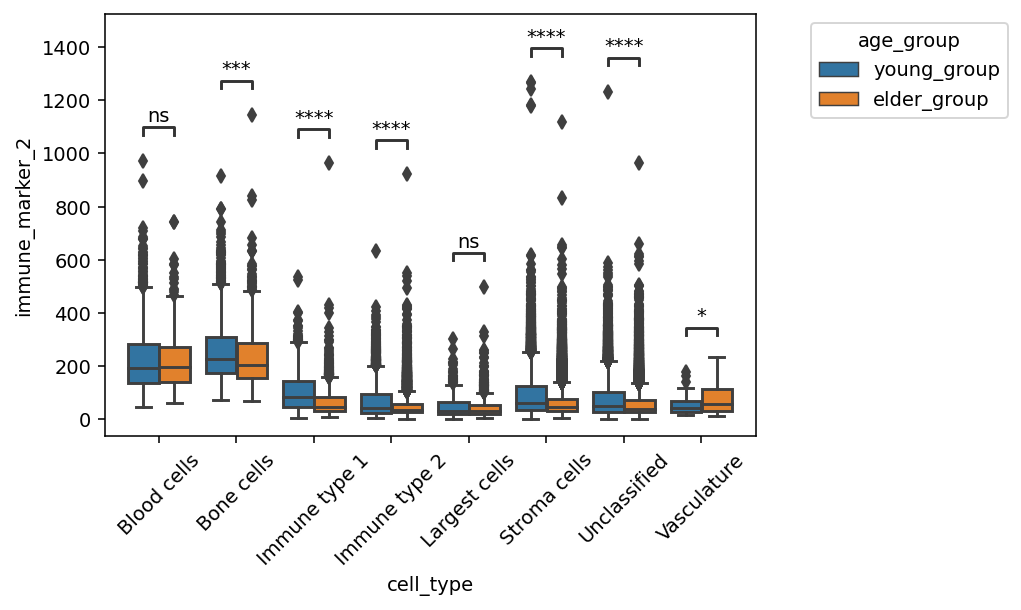

In [21]:
x = 'cell_type'
y = 'immune_marker_2'
hue = 'age_group'

hue_order = ['young_group', 'elder_group']

pairs = [((cell, 'young_group'), (cell, 'elder_group'))
                         for cell in sp_data[x].unique()]

ax = sns.boxplot(data=sp_data, x=x, y=y, hue=hue, hue_order=hue_order)
plt.xticks(rotation=45)

annotator = Annotator(ax, pairs, data=sp_data, x=x, y=y, 
                      hue_order=hue_order, hue=hue)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.07, 1), title=hue)

**Вывод: Экспрессия имунных маркеров 2 типа в зависимости от возраста различается во всех типах клеток, за исключением клеток крови и муннных клеток 2 типа.**

1) Есть ли стат-значимость между типом клетки и:

в) Дистанцией до ближайших объектов (distance_to_vasculature, distance_to_largest_cell), добавьте hue по возрастным группам.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Stroma cells vs. Unclassified: Mann-Whitney-Wilcoxon test two-sided, P_val:2.377e-139 U_stat=6.182e+09
Unclassified vs. Immune type 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.617e-97 U_stat=6.000e+08
Immune type 2 vs. Blood cells: Mann-Whitney-Wilcoxon test two-sided, P_val:2.481e-100 U_stat=1.711e+07
Blood cells vs. Bone cells: Mann-Whitney-Wilcoxon test two-sided, P_val:1.078e-01 U_stat=3.509e+06
Bone cells vs. Largest cells: Mann-Whitney-Wilcoxon test two-sided, P_val:1.553e-33 U_stat=3.069e+06
Largest cells vs. Immune type 1: Mann-Whitney-Wilcoxon test two-sided, P_val:8.328e-09 U_stat=5.060e+06
Immune type 1 vs. Vasculature: Mann-Whitney-Wilcoxon test two-sided, P_val:5.458e-92 U_stat=7.993e+05
Stroma cells vs. Immune type 2: Mann-Whitney-Wilcoxon test two-sided, P_val:8.439e-280 U_stat=1.641e+09


(<matplotlib.axes._subplots.AxesSubplot at 0x7fde6d23e820>,
  <statannotations.Annotation.Annotation at 0x7fde6d0901f0>])

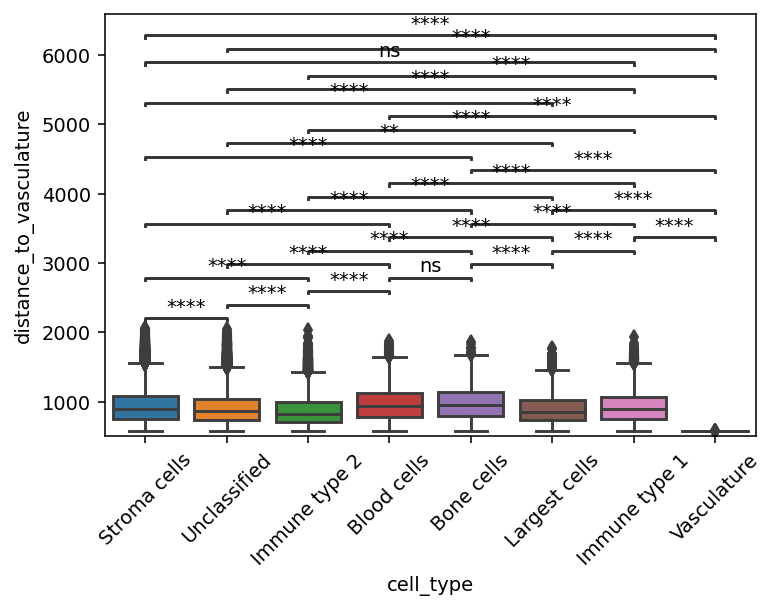

In [22]:
x = 'cell_type'
y = 'distance_to_vasculature'
     

order = sp_data[x].unique()
     

pairs = list(combinations(order, 2))
     

ax = sns.boxplot(data=sp_data, x=x, y=y, order=order)
plt.xticks(rotation=45)

annotator = Annotator(ax, pairs, data=sp_data, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

**Вывод: Расстояние до сосудов достоверно различныпо всем типам клеток, кроме клеток крови, остеоцитов, сосудистых и некласиифицируемых клеток.**

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Stroma cells vs. Unclassified: Mann-Whitney-Wilcoxon test two-sided, P_val:6.110e-03 U_stat=5.841e+09
Unclassified vs. Immune type 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.080e-39 U_stat=5.786e+08
Immune type 2 vs. Blood cells: Mann-Whitney-Wilcoxon test two-sided, P_val:1.704e-10 U_stat=2.111e+07
Blood cells vs. Bone cells: Mann-Whitney-Wilcoxon test two-sided, P_val:1.611e-02 U_stat=3.463e+06
Bone cells vs. Largest cells: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=5.079e+06
Largest cells vs. Immune type 1: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=0.000e+00
Immune type 1 vs. Vasculature: Mann-Whitney-Wilcoxon test two-sided, P_val:2.228e-01 U_stat=4.252e+05
Stroma cells vs. Immune type 2: Mann-Whitney-Wilcoxon test two-sided, P_val:7.925e-55 U_stat=1.507e+09
Unc

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde6cec3790>,
  <statannotations.Annotation.Annotation at 0x7fde6ce0ecd0>])

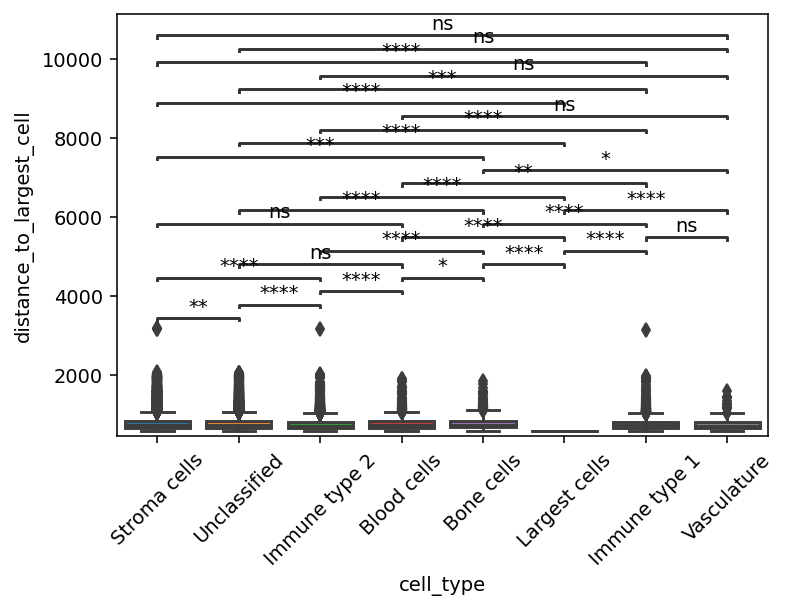

In [23]:
x = 'cell_type'
y = 'distance_to_largest_cell'
     

ax = sns.boxplot(data=sp_data, x=x, y=y, order=order)
plt.xticks(rotation=45)

annotator = Annotator(ax, pairs, data=sp_data, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

**Вывод: Расстояние до крупнейших клеток достоверно различается по всем типам клеток**.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Bone cells_young_group vs. Bone cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:2.128e-47 U_stat=6.172e+05
Blood cells_young_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:9.418e-53 U_stat=8.547e+05
Immune type 1_young_group vs. Immune type 1_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:2.313e-132 U_stat=4.486e+06
Stroma cells_young_group vs. Stroma cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=4.039e+09
Unclassified_young_group vs. Unclassified_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=6.991e+08
Immune type 2_young_group vs. Immune type 2_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=4.425e+07
Largest cells_young_group vs. Largest cells_elder_group: Mann-Wh

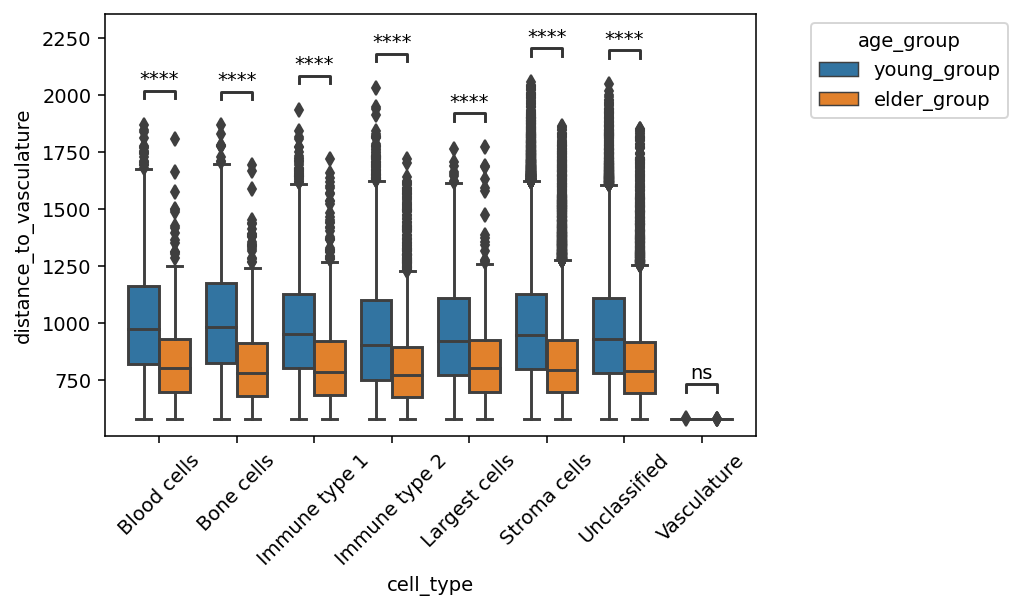

In [24]:
# возрастной фактор в влияние расстояния до наибольших клеток

x = 'cell_type'
y = 'distance_to_vasculature'
hue = 'age_group'

hue_order = ['young_group', 'elder_group']

pairs = [((cell, 'young_group'), (cell, 'elder_group'))
                         for cell in sp_data[x].unique()]

ax = sns.boxplot(data=sp_data, x=x, y=y, hue=hue, hue_order=hue_order)
plt.xticks(rotation=45)

annotator = Annotator(ax, pairs, data=sp_data, x=x, y=y, 
                      hue_order=hue_order, hue=hue)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.07, 1), title=hue)

**Вывод: Расстояние до сосудов достоверно различается во всех типах клеток с учетом возраста, кроме сосудистых клеток.**

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Bone cells_young_group vs. Bone cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:8.455e-05 U_stat=4.758e+05
Blood cells_young_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:2.110e-06 U_stat=6.779e+05
Immune type 1_young_group vs. Immune type 1_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:8.844e-01 U_stat=3.168e+06
Stroma cells_young_group vs. Stroma cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:2.726e-240 U_stat=3.220e+09
Unclassified_young_group vs. Unclassified_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:3.806e-222 U_stat=5.892e+08
Immune type 2_young_group vs. Immune type 2_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:6.693e-74 U_stat=3.807e+07
Largest cells_young_group vs. Largest cells_elder_group: Mann-W

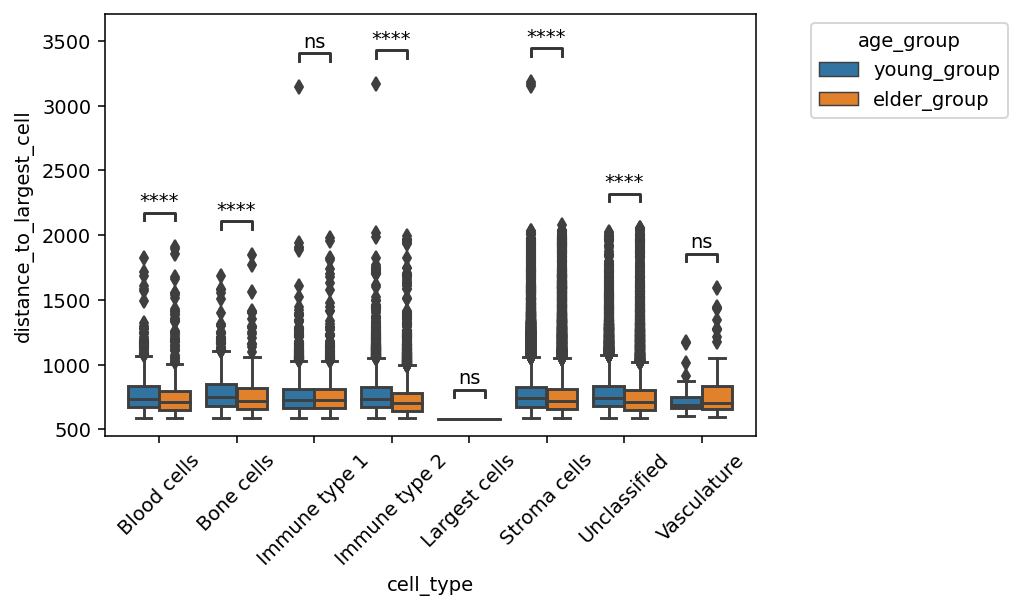

In [25]:
x = 'cell_type'
y = 'distance_to_largest_cell'
hue = 'age_group'

hue_order = ['young_group', 'elder_group']

pairs = [((cell, 'young_group'), (cell, 'elder_group'))
                         for cell in sp_data[x].unique()]

ax = sns.boxplot(data=sp_data, x=x, y=y, hue=hue, hue_order=hue_order)
plt.xticks(rotation=45)

annotator = Annotator(ax, pairs, data=sp_data, x=x, y=y, 
                      hue_order=hue_order, hue=hue)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.07, 1), title=hue)

**Вывод: Расстояние до сосудов различаются для всех типов клеток с учетом возраста, кроме сосудистых клеток и клеток иммунных клеток 1 типа.**

2) В каком клеточном микроокружении клеток какого типа статистически больше, чем в других микроокружениях? (колонка cell_interaction). Для ответа используйте box_plot/swarplot с hue по микроокружениям, где:

по Ох будут типы клеток,
по Оу — их количество.
Не забудьте посчитать количество для каждого пациента отдельно, иначе выборка не будет репрезентативной.

In [27]:
sp_data.reset_index(inplace=True)
sp_data.head()

,index,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
2,2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
3,3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group


In [28]:
community_cell_count = pd.pivot_table(sp_data, 
                index= ['case_id','cell_interaction'], 
                columns='cell_type',
                values='index',
                aggfunc=len
                ).fillna(0).reset_index()

community_cell_count.head()

cell_type,case_id,cell_interaction,Blood cells,Bone cells,Immune type 1,Immune type 2,Largest cells,Stroma cells,Unclassified,Vasculature
0,40,community_1,37.0,27.0,27.0,1343.0,67.0,5522.0,396.0,2.0
1,40,community_2,40.0,10.0,130.0,420.0,22.0,4994.0,2116.0,2.0
2,40,community_3,20.0,12.0,293.0,530.0,22.0,1816.0,5549.0,10.0
3,40,community_4,18.0,3.0,6.0,158.0,18.0,3333.0,131.0,2.0
4,40,community_5,77.0,91.0,469.0,2440.0,220.0,5046.0,5300.0,21.0


In [31]:
cell_types = [
              'Bone cells', 
              'Blood cells', 
              'Immune type 1', 
              'Immune type 2', 
              'Stroma cells', 
              'Largest cells', 
              'Unclassified', 
              'Vasculature'
              ]
     

sp_data_1 = pd.melt(community_cell_count, value_vars=cell_types, 
               var_name='cell_type', value_name='cell_number', 
               id_vars='cell_interaction')
sp_data_1.head()

,cell_interaction,cell_type,cell_number
0,community_1,Bone cells,27.0
1,community_2,Bone cells,10.0
2,community_3,Bone cells,12.0
3,community_4,Bone cells,3.0
4,community_5,Bone cells,91.0


In [32]:
x = 'cell_type'
y = 'cell_number'

order = sp_data_1[x].unique()
pairs = list(combinations(order, 2))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Bone cells vs. Blood cells: Mann-Whitney-Wilcoxon test two-sided, P_val:5.992e-01 U_stat=2.650e+01
Blood cells vs. Immune type 1: Mann-Whitney-Wilcoxon test two-sided, P_val:3.181e-01 U_stat=4.200e+01
Immune type 1 vs. Immune type 2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.351e-03 U_stat=5.000e+00
Immune type 2 vs. Stroma cells: Mann-Whitney-Wilcoxon test two-sided, P_val:2.953e-03 U_stat=5.000e+00
Stroma cells vs. Largest cells: Mann-Whitney-Wilcoxon test two-sided, P_val:9.310e-04 U_stat=6.400e+01
Largest cells vs. Unclassified: Mann-Whitney-Wilcoxon test two-sided, P_val:7.362e-03 U_stat=6.000e+00
Unclassified vs. Vasculature: Mann-Whitney-Wilcoxon test two-sided, P_val:9.148e-04 U_stat=6.400e+01
Bone cells vs. Immune type 1: Mann-Whitney-Wilcoxon test two-sided, P_val:5.990e-01 U_stat=3.750e+01
Blo

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde6caa4d60>,
  <statannotations.Annotation.Annotation at 0x7fde6c811850>])

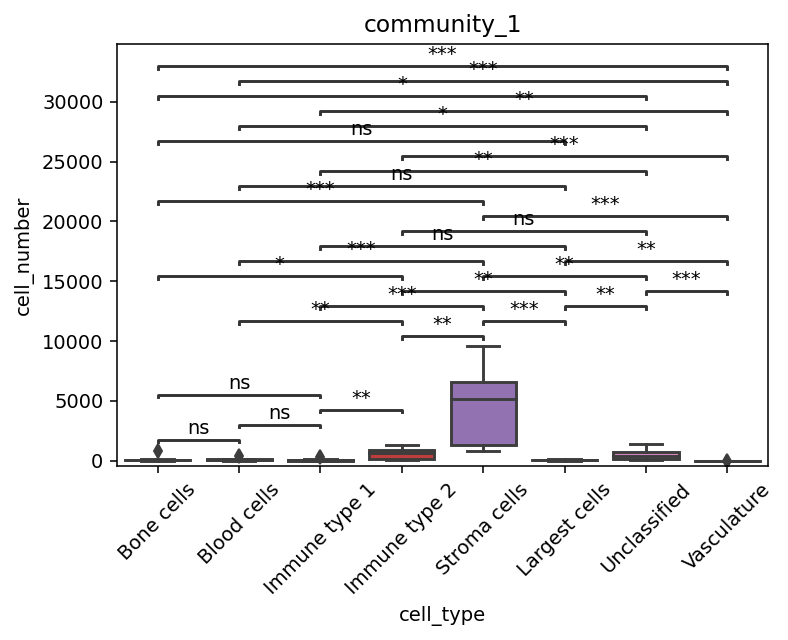

In [33]:
# оцениваем тип наибольших клеток в 'community_1'
ax = sns.boxplot(data=sp_data_1[sp_data_1['cell_interaction'] == 'community_1'], 
                 x=x, y=y, order=order)
plt.xticks(rotation=45)
plt.title('community_1')

annotator = Annotator(ax, pairs, 
                      data=sp_data_1[sp_data_1['cell_interaction'] == 'community_1'], 
                      x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

**Вывод: Наибольшее количество стромальных клеток.**




p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Bone cells vs. Blood cells: Mann-Whitney-Wilcoxon test two-sided, P_val:3.556e-02 U_stat=1.150e+01
Blood cells vs. Immune type 1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.719e-01 U_stat=1.850e+01
Immune type 1 vs. Immune type 2: Mann-Whitney-Wilcoxon test two-sided, P_val:3.823e-01 U_stat=2.300e+01
Immune type 2 vs. Stroma cells: Mann-Whitney-Wilcoxon test two-sided, P_val:1.554e-04 U_stat=0.000e+00
Stroma cells vs. Largest cells: Mann-Whitney-Wilcoxon test two-sided, P_val:9.229e-04 U_stat=6.400e+01
Largest cells vs. Unclassified: Mann-Whitney-Wilcoxon test two-sided, P_val:9.229e-04 U_stat=0.000e+00
Unclassified vs. Vasculature: Mann-Whitney-Wilcoxon test two-sided, P_val:8.989e-04 U_stat=6.400e+01
Bone cells vs. Immune type 1: Mann-Whitney-Wilcoxon test two-sided, P_val:4.662e-03 U_stat=6.000e+00
Blo

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde6c3f6a90>,
  <statannotations.Annotation.Annotation at 0x7fde6c350070>])

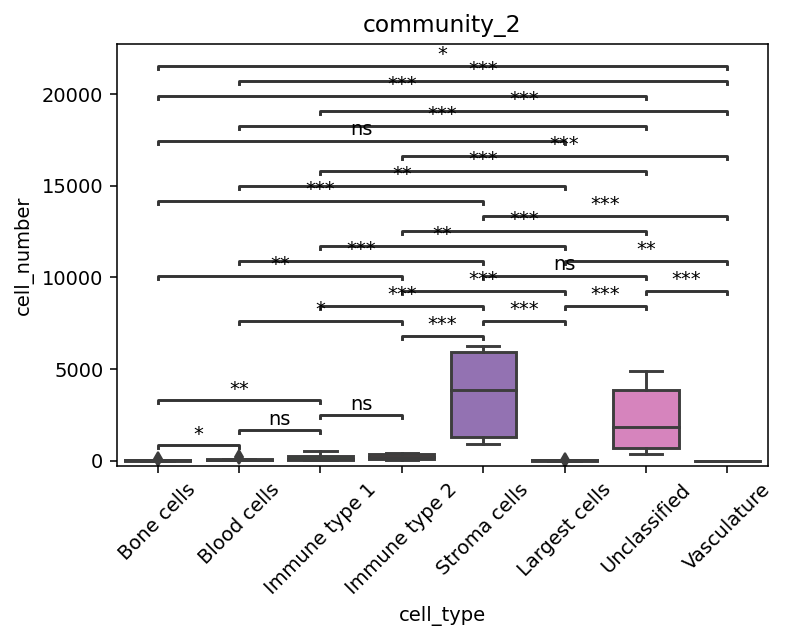

In [36]:
# Определяем тип наибольшего количества клеток в 'community_2'
ax = sns.boxplot(data=sp_data_1[sp_data_1['cell_interaction'] == 'community_2'], 
                 x=x, y=y, order=order)
plt.xticks(rotation=45)
plt.title('community_2')


annotator = Annotator(ax, pairs, 
                      data=sp_data_1[sp_data_1['cell_interaction'] == 
                      'community_2'], x=x,
                      y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

**Вывод: максимальное количество стромальных и некласифицируемых клеток.**

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Bone cells vs. Blood cells: Mann-Whitney-Wilcoxon test two-sided, P_val:4.268e-01 U_stat=2.400e+01
Blood cells vs. Immune type 1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.591e-03 U_stat=1.500e+00
Immune type 1 vs. Immune type 2: Mann-Whitney-Wilcoxon test two-sided, P_val:8.785e-01 U_stat=3.000e+01
Immune type 2 vs. Stroma cells: Mann-Whitney-Wilcoxon test two-sided, P_val:1.865e-03 U_stat=4.000e+00
Stroma cells vs. Largest cells: Mann-Whitney-Wilcoxon test two-sided, P_val:9.069e-04 U_stat=6.400e+01
Largest cells vs. Unclassified: Mann-Whitney-Wilcoxon test two-sided, P_val:9.069e-04 U_stat=0.000e+00
Unclassified vs. Vasculature: Mann-Whitney-Wilcoxon test two-sided, P_val:8.989e-04 U_stat=6.400e+01
Bone cells vs. Immune type 1: Mann-Whitney-Wilcoxon test two-sided, P_val:9.229e-04 U_stat=0.000e+00
Blo

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde6c2ddc40>,
  <statannotations.Annotation.Annotation at 0x7fde6c1c2250>])

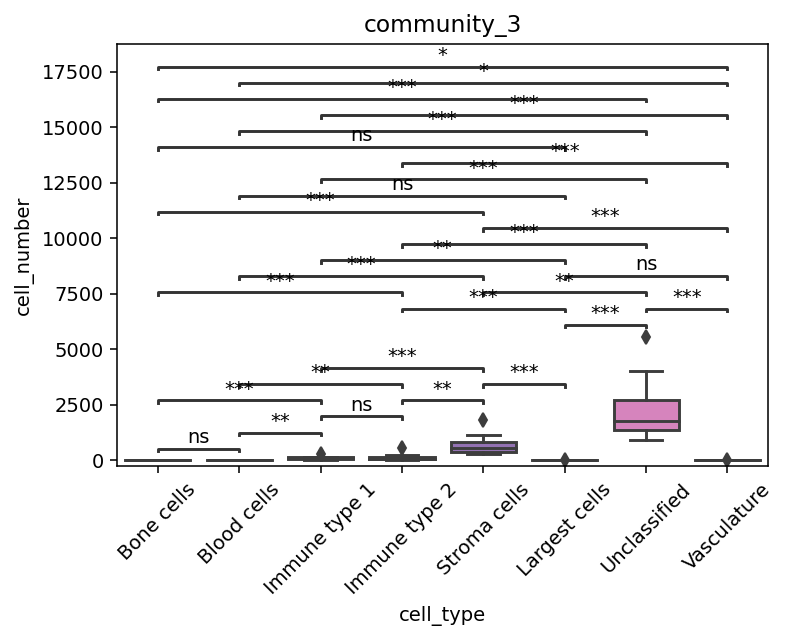

In [37]:
# определяем тип с максимальным количеством клеток в 'community_3'
ax = sns.boxplot(data=sp_data_1[sp_data_1['cell_interaction'] == 'community_3'],
                 x=x, y=y, order=order)
plt.xticks(rotation=45)
plt.title('community_3')


annotator = Annotator(ax, pairs, data=sp_data_1[sp_data_1['cell_interaction'] ==
                      'community_3'], x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

**Вывод: обнаруживается максимальное количество неклассифицируемых клеток.**

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Bone cells vs. Blood cells: Mann-Whitney-Wilcoxon test two-sided, P_val:3.969e-02 U_stat=1.200e+01
Blood cells vs. Immune type 1: Mann-Whitney-Wilcoxon test two-sided, P_val:2.473e-01 U_stat=4.350e+01
Immune type 1 vs. Immune type 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.813e-02 U_stat=1.100e+01
Immune type 2 vs. Stroma cells: Mann-Whitney-Wilcoxon test two-sided, P_val:3.108e-04 U_stat=1.000e+00
Stroma cells vs. Largest cells: Mann-Whitney-Wilcoxon test two-sided, P_val:1.554e-04 U_stat=6.400e+01
Largest cells vs. Unclassified: Mann-Whitney-Wilcoxon test two-sided, P_val:1.041e-02 U_stat=8.000e+00
Unclassified vs. Vasculature: Mann-Whitney-Wilcoxon test two-sided, P_val:8.754e-04 U_stat=6.400e+01
Bone cells vs. Immune type 1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.547e-01 U_stat=1.800e+01
Blo

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde6c15a400>,
  <statannotations.Annotation.Annotation at 0x7fde6ca18c10>])

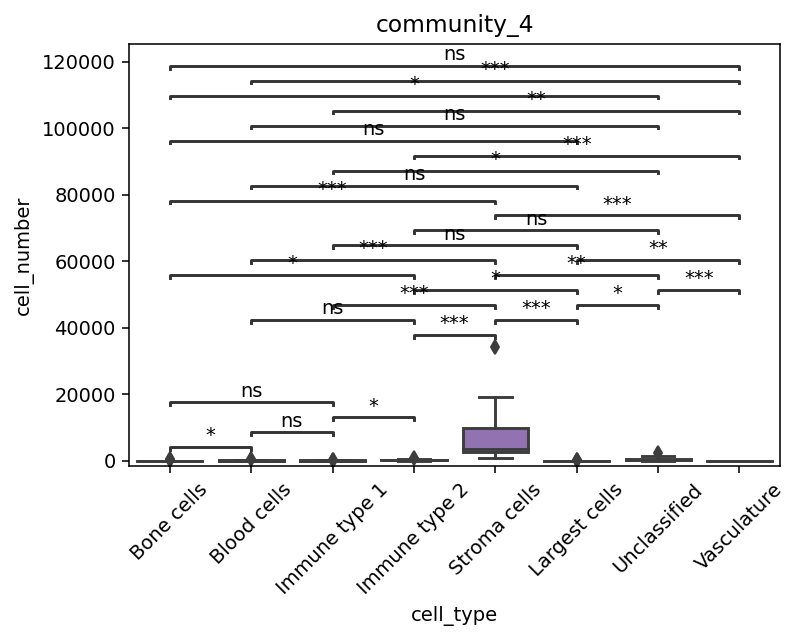

In [38]:
# определяем тип максимального количества клеток в 'community_4'
ax = sns.boxplot(data=sp_data_1[sp_data_1['cell_interaction'] == 'community_4'],
                 x=x, y=y, 
                 order=order)
plt.xticks(rotation=45)
plt.title('community_4')


annotator = Annotator(ax, pairs, data=sp_data_1[sp_data_1['cell_interaction'] == 
                    'community_4'], x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

**Вывод: стромальных клеток максимальное количество.**

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Bone cells vs. Blood cells: Mann-Whitney-Wilcoxon test two-sided, P_val:3.181e-01 U_stat=4.200e+01
Blood cells vs. Immune type 1: Mann-Whitney-Wilcoxon test two-sided, P_val:3.120e-02 U_stat=1.100e+01
Immune type 1 vs. Immune type 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.345e-01 U_stat=2.000e+01
Immune type 2 vs. Stroma cells: Mann-Whitney-Wilcoxon test two-sided, P_val:3.792e-02 U_stat=1.200e+01
Stroma cells vs. Largest cells: Mann-Whitney-Wilcoxon test two-sided, P_val:9.310e-04 U_stat=6.400e+01
Largest cells vs. Unclassified: Mann-Whitney-Wilcoxon test two-sided, P_val:9.310e-04 U_stat=0.000e+00
Unclassified vs. Vasculature: Mann-Whitney-Wilcoxon test two-sided, P_val:9.069e-04 U_stat=6.400e+01
Bone cells vs. Immune type 1: Mann-Whitney-Wilcoxon test two-sided, P_val:9.265e-02 U_stat=1.550e+01
Blo

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde6c0153d0>,
  <statannotations.Annotation.Annotation at 0x7fde6bf11a60>])

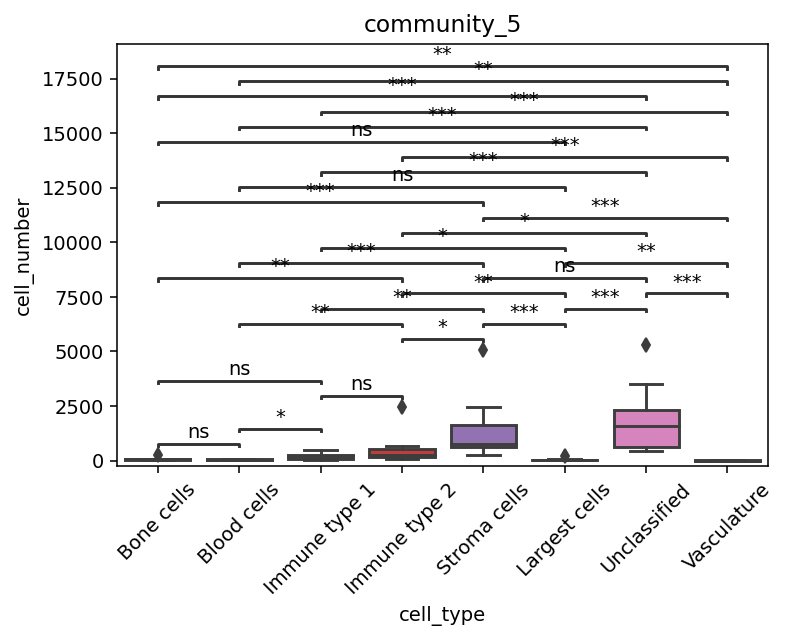

In [39]:
# определяем тип максимального количества клеток в 'community_5'
ax = sns.boxplot(data=sp_data_1[sp_data_1['cell_interaction'] == 'community_5'],
                 x=x, y=y, order=order)
plt.xticks(rotation=45)
plt.title('community_5')


annotator = Annotator(ax, pairs, data=sp_data_1[sp_data_1['cell_interaction'] == 
                      'community_5'], x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

**Вывод: стромальных и недиффиренцируемых клеток максимальное количество.**


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Bone cells vs. Blood cells: Mann-Whitney-Wilcoxon test two-sided, P_val:9.163e-01 U_stat=3.350e+01
Blood cells vs. Immune type 1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.088e-03 U_stat=3.000e+00
Immune type 1 vs. Immune type 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.933e-01 U_stat=2.150e+01
Immune type 2 vs. Stroma cells: Mann-Whitney-Wilcoxon test two-sided, P_val:1.088e-03 U_stat=3.000e+00
Stroma cells vs. Largest cells: Mann-Whitney-Wilcoxon test two-sided, P_val:1.554e-04 U_stat=6.400e+01
Largest cells vs. Unclassified: Mann-Whitney-Wilcoxon test two-sided, P_val:6.216e-04 U_stat=2.000e+00
Unclassified vs. Vasculature: Mann-Whitney-Wilcoxon test two-sided, P_val:8.989e-04 U_stat=6.400e+01
Bone cells vs. Immune type 1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.088e-03 U_stat=3.000e+00
Blo

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde6bd996d0>,
  <statannotations.Annotation.Annotation at 0x7fde6bcc32e0>])

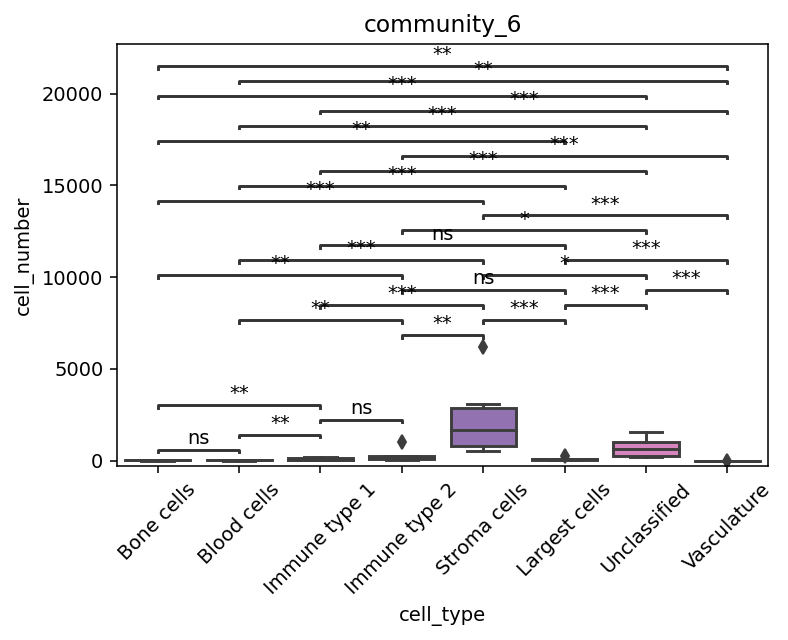

In [40]:
# тип максимального количества клеток в  'community_6'
ax = sns.boxplot(data=sp_data_1[sp_data_1['cell_interaction'] == 'community_6'],
                 x=x, y=y, order=order)
plt.xticks(rotation=45)
plt.title('community_6')


annotator = Annotator(ax, pairs, data=sp_data_1[sp_data_1['cell_interaction'] ==
                      'community_6'], x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

**Вывод: стромальных клеток максимальное количество.**

**Общий вывод: стромальных клеток максимальное количество.**

In [42]:
x = 'cell_interaction'
y = 'cell_number'

order = sp_data_1[x].unique()
pairs = list(combinations(order, 2))
     

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

community_1 vs. community_2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.054e-01 U_stat=3.900e+01
community_2 vs. community_3: Mann-Whitney-Wilcoxon test two-sided, P_val:3.529e-02 U_stat=5.250e+01
community_3 vs. community_4: Mann-Whitney-Wilcoxon test two-sided, P_val:5.100e-02 U_stat=1.300e+01
community_4 vs. community_5: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=3.150e+01
community_5 vs. community_6: Mann-Whitney-Wilcoxon test two-sided, P_val:1.146e-01 U_stat=4.750e+01
community_1 vs. community_3: Mann-Whitney-Wilcoxon test two-sided, P_val:6.208e-03 U_stat=5.850e+01
community_2 vs. community_4: Mann-Whitney-Wilcoxon test two-sided, P_val:9.581e-01 U_stat=3.300e+01
community_3 vs. community_5: Mann-Whitney-Wilcoxon test two-sided, P_val:1.147e-02 U_stat=7.500e+00
community_4 vs. com

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde6bc5aa30>,
  <statannotations.Annotation.Annotation at 0x7fde6bb5bfd0>])

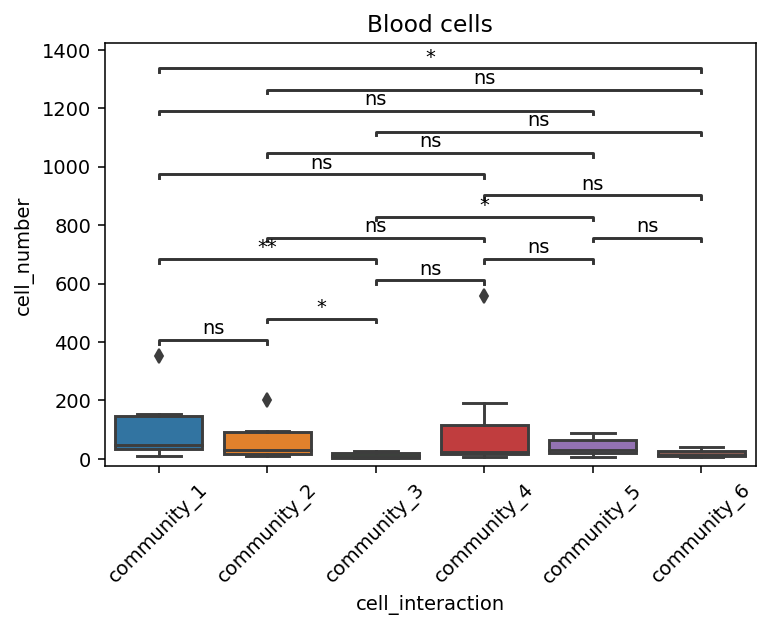

In [43]:
# определяем 'community' в котором больше всего 'Blood cells'
ax = sns.boxplot(data=sp_data_1[sp_data_1['cell_type'] == 'Blood cells'], x=x, 
                 y=y, order=order)
plt.xticks(rotation=45)
plt.title('Blood cells')


annotator = Annotator(ax, pairs, data=sp_data_1[sp_data_1['cell_type'] ==
                      'Blood cells'], x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

community_1 vs. community_2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.067e-02 U_stat=5.400e+01
community_2 vs. community_3: Mann-Whitney-Wilcoxon test two-sided, P_val:6.737e-01 U_stat=3.650e+01
community_3 vs. community_4: Mann-Whitney-Wilcoxon test two-sided, P_val:2.049e-01 U_stat=4.450e+01
community_4 vs. community_5: Mann-Whitney-Wilcoxon test two-sided, P_val:6.509e-02 U_stat=1.400e+01
community_5 vs. community_6: Mann-Whitney-Wilcoxon test two-sided, P_val:6.993e-03 U_stat=5.700e+01
community_1 vs. community_3: Mann-Whitney-Wilcoxon test two-sided, P_val:2.722e-03 U_stat=6.100e+01
community_2 vs. community_4: Mann-Whitney-Wilcoxon test two-sided, P_val:2.441e-01 U_stat=4.350e+01
community_3 vs. community_5: Mann-Whitney-Wilcoxon test two-sided, P_val:2.722e-03 U_stat=3.000e+00
community_4 vs. com

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde6bab8c10>,
  <statannotations.Annotation.Annotation at 0x7fde6ba6a400>])

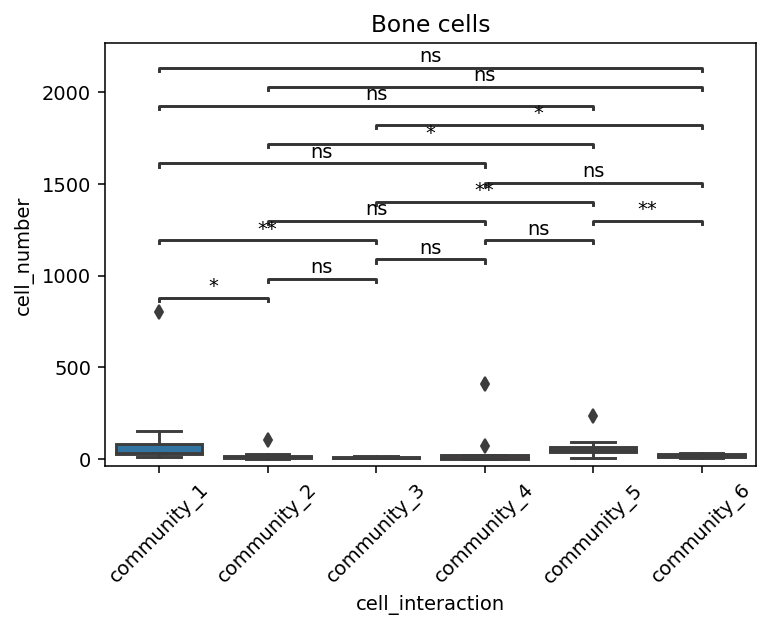

In [44]:
# определяем 'community' в котором больше всего 'Bone cells'
ax = sns.boxplot(data=sp_data_1[sp_data_1['cell_type'] == 
                'Bone cells'], x=x, y=y, order=order)
plt.xticks(rotation=45)
plt.title('Bone cells')


annotator = Annotator(ax, pairs, data=sp_data_1[sp_data_1['cell_type'] ==
                      'Bone cells'], x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

community_1 vs. community_2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.889e-01 U_stat=1.900e+01
community_2 vs. community_3: Mann-Whitney-Wilcoxon test two-sided, P_val:8.335e-01 U_stat=3.450e+01
community_3 vs. community_4: Mann-Whitney-Wilcoxon test two-sided, P_val:8.298e-02 U_stat=4.900e+01
community_4 vs. community_5: Mann-Whitney-Wilcoxon test two-sided, P_val:2.813e-02 U_stat=1.100e+01
community_5 vs. community_6: Mann-Whitney-Wilcoxon test two-sided, P_val:1.605e-01 U_stat=4.600e+01
community_1 vs. community_3: Mann-Whitney-Wilcoxon test two-sided, P_val:2.268e-01 U_stat=2.000e+01
community_2 vs. community_4: Mann-Whitney-Wilcoxon test two-sided, P_val:4.988e-02 U_stat=5.100e+01
community_3 vs. community_5: Mann-Whitney-Wilcoxon test two-sided, P_val:2.786e-01 U_stat=2.100e+01
community_4 vs. com

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde6ba58f10>,
  <statannotations.Annotation.Annotation at 0x7fde6b8fd190>])

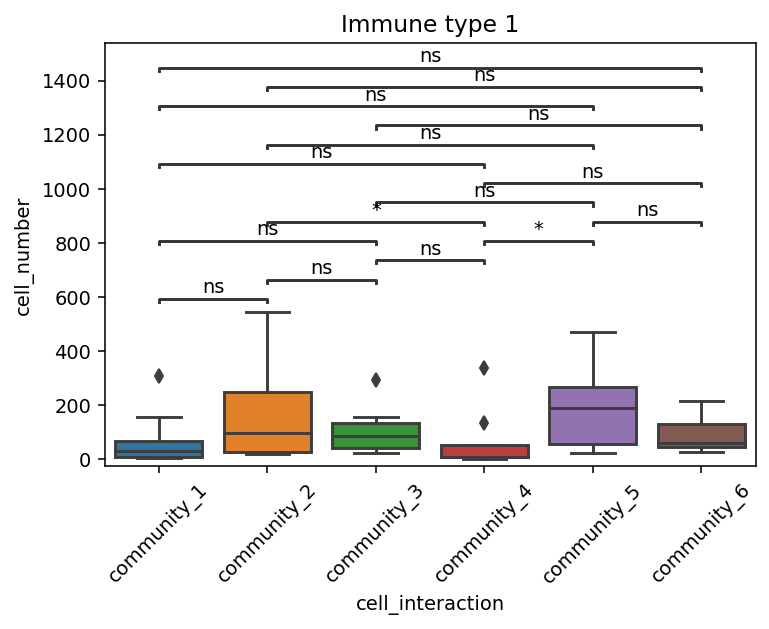

In [45]:
# тип 'community' в котором больше 'Immune type 1'
ax = sns.boxplot(data=sp_data_1[sp_data_1['cell_type'] == 'Immune type 1'], x=x,
                 y=y, order=order)
plt.xticks(rotation=45)
plt.title('Immune type 1')


annotator = Annotator(ax, pairs, data=sp_data_1[sp_data_1['cell_type'] == 
                      'Immune type 1'], x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

community_1 vs. community_2: Mann-Whitney-Wilcoxon test two-sided, P_val:8.298e-02 U_stat=4.900e+01
community_2 vs. community_3: Mann-Whitney-Wilcoxon test two-sided, P_val:3.282e-01 U_stat=4.200e+01
community_3 vs. community_4: Mann-Whitney-Wilcoxon test two-sided, P_val:5.992e-01 U_stat=2.650e+01
community_4 vs. community_5: Mann-Whitney-Wilcoxon test two-sided, P_val:1.949e-01 U_stat=1.900e+01
community_5 vs. community_6: Mann-Whitney-Wilcoxon test two-sided, P_val:2.345e-01 U_stat=4.400e+01
community_1 vs. community_3: Mann-Whitney-Wilcoxon test two-sided, P_val:2.813e-02 U_stat=5.300e+01
community_2 vs. community_4: Mann-Whitney-Wilcoxon test two-sided, P_val:7.984e-01 U_stat=3.500e+01
community_3 vs. community_5: Mann-Whitney-Wilcoxon test two-sided, P_val:2.067e-02 U_stat=1.000e+01
community_4 vs. com

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde6b8b4af0>,
  <statannotations.Annotation.Annotation at 0x7fde6b800a60>])

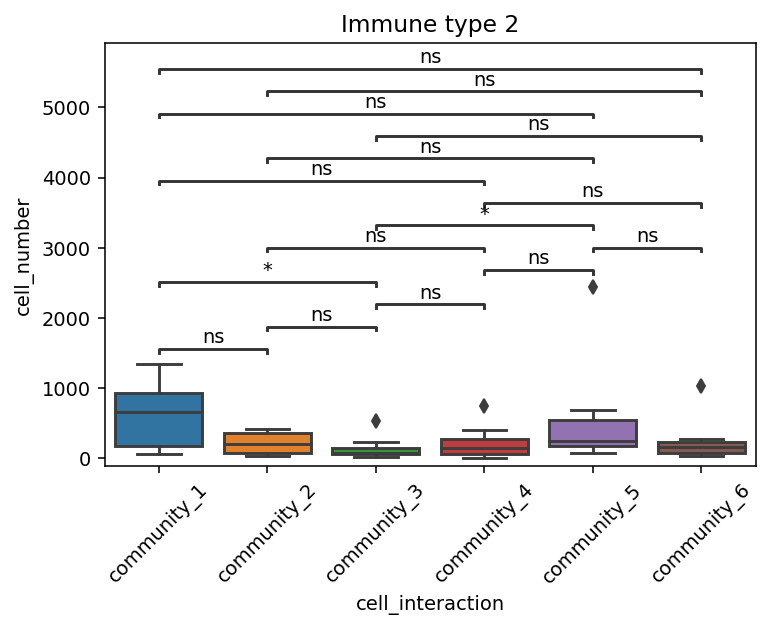

In [46]:
# тип 'community' в котором больше 'Immune type 2'
ax = sns.boxplot(data=sp_data_1[sp_data_1['cell_type'] == 'Immune type 2'], x=x,
                 y=y, order=order)
plt.xticks(rotation=45)
plt.title('Immune type 2')


annotator = Annotator(ax, pairs, data=sp_data_1[sp_data_1['cell_type'] ==
                      'Immune type 2'], x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

community_1 vs. community_2: Mann-Whitney-Wilcoxon test two-sided, P_val:3.095e-02 U_stat=5.300e+01
community_2 vs. community_3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.867e-01 U_stat=4.500e+01
community_3 vs. community_4: Mann-Whitney-Wilcoxon test two-sided, P_val:6.389e-02 U_stat=1.400e+01
community_4 vs. community_5: Mann-Whitney-Wilcoxon test two-sided, P_val:4.616e-01 U_stat=2.450e+01
community_5 vs. community_6: Mann-Whitney-Wilcoxon test two-sided, P_val:3.120e-02 U_stat=1.100e+01
community_1 vs. community_3: Mann-Whitney-Wilcoxon test two-sided, P_val:8.216e-03 U_stat=5.750e+01
community_2 vs. community_4: Mann-Whitney-Wilcoxon test two-sided, P_val:1.886e-01 U_stat=1.900e+01
community_3 vs. community_5: Mann-Whitney-Wilcoxon test two-sided, P_val:6.094e-03 U_stat=5.500e+00
community_4 vs. com

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde6b917700>,
  <statannotations.Annotation.Annotation at 0x7fde6b70d7f0>])

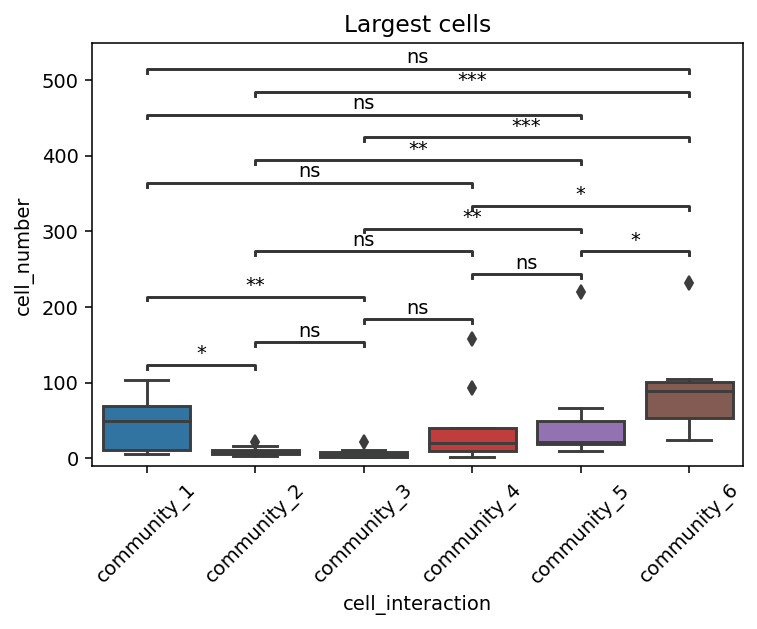

In [47]:
# тип 'community' в котором больше всего 'Largest cells'
ax = sns.boxplot(data=sp_data_1[sp_data_1['cell_type'] == 'Largest cells'], x=x,
                 y=y, order=order)
plt.xticks(rotation=45)
plt.title('Largest cells')


annotator = Annotator(ax, pairs, data=sp_data_1[sp_data_1['cell_type'] == 
                      'Largest cells'], x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

community_1 vs. community_2: Mann-Whitney-Wilcoxon test two-sided, P_val:6.454e-01 U_stat=3.700e+01
community_2 vs. community_3: Mann-Whitney-Wilcoxon test two-sided, P_val:2.953e-03 U_stat=5.900e+01
community_3 vs. community_4: Mann-Whitney-Wilcoxon test two-sided, P_val:2.953e-03 U_stat=5.000e+00
community_4 vs. community_5: Mann-Whitney-Wilcoxon test two-sided, P_val:2.813e-02 U_stat=5.300e+01
community_5 vs. community_6: Mann-Whitney-Wilcoxon test two-sided, P_val:3.282e-01 U_stat=2.200e+01
community_1 vs. community_3: Mann-Whitney-Wilcoxon test two-sided, P_val:2.953e-03 U_stat=5.900e+01
community_2 vs. community_4: Mann-Whitney-Wilcoxon test two-sided, P_val:7.209e-01 U_stat=2.800e+01
community_3 vs. community_5: Mann-Whitney-Wilcoxon test two-sided, P_val:3.282e-01 U_stat=2.200e+01
community_4 vs. com

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde6b6be3d0>,
  <statannotations.Annotation.Annotation at 0x7fde6b615820>])

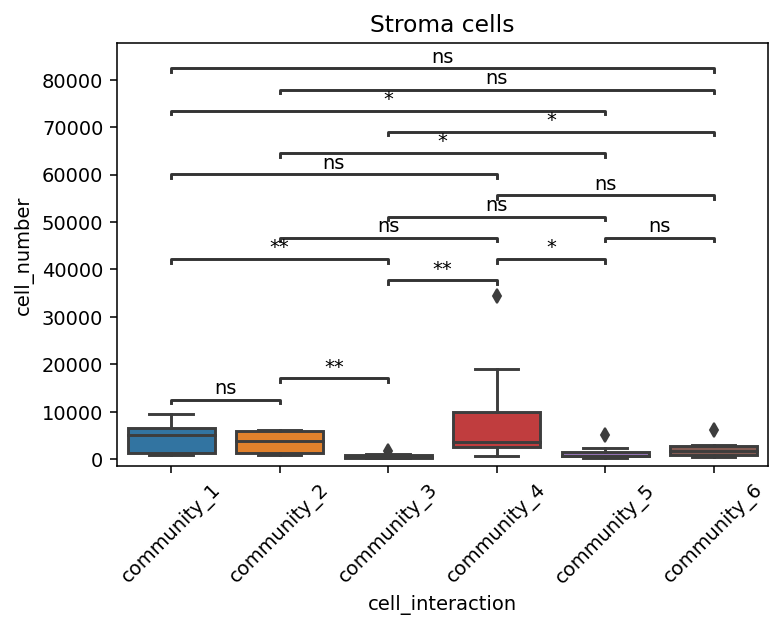

In [48]:
# определяем 'community' в котором больше 'Stroma cells'
ax = sns.boxplot(data=sp_data_1[sp_data_1['cell_type'] == 'Stroma cells'], x=x, 
                 y=y, order=order)
plt.xticks(rotation=45)
plt.title('Stroma cells')


annotator = Annotator(ax, pairs, data=sp_data_1[sp_data_1['cell_type'] == 
                      'Stroma cells'], x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

community_1 vs. community_2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.813e-02 U_stat=1.100e+01
community_2 vs. community_3: Mann-Whitney-Wilcoxon test two-sided, P_val:7.984e-01 U_stat=2.900e+01
community_3 vs. community_4: Mann-Whitney-Wilcoxon test two-sided, P_val:1.041e-02 U_stat=5.600e+01
community_4 vs. community_5: Mann-Whitney-Wilcoxon test two-sided, P_val:1.476e-02 U_stat=9.000e+00
community_5 vs. community_6: Mann-Whitney-Wilcoxon test two-sided, P_val:4.988e-02 U_stat=5.100e+01
community_1 vs. community_3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.088e-03 U_stat=3.000e+00
community_2 vs. community_4: Mann-Whitney-Wilcoxon test two-sided, P_val:1.041e-02 U_stat=5.600e+01
community_3 vs. community_5: Mann-Whitney-Wilcoxon test two-sided, P_val:3.823e-01 U_stat=4.100e+01
community_4 vs. com

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde6b5e9310>,
  <statannotations.Annotation.Annotation at 0x7fde6b5255e0>])

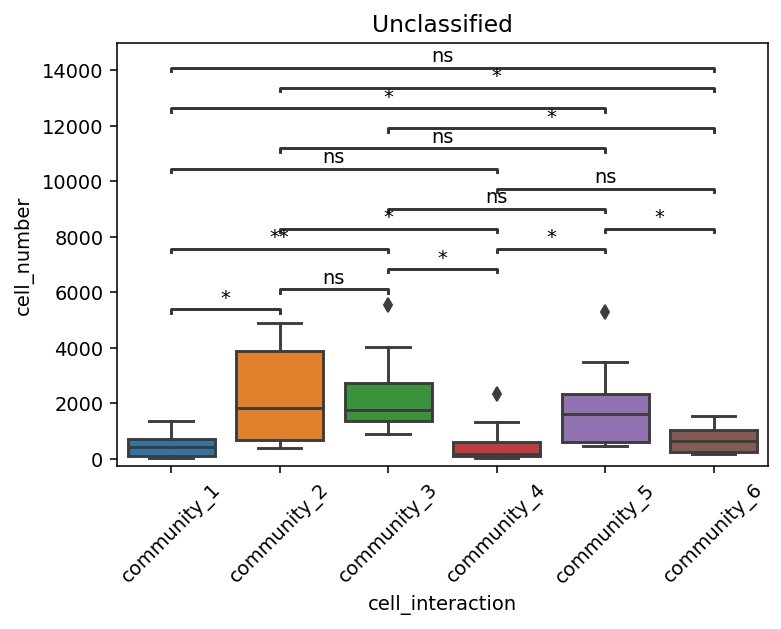

In [49]:
# определяем 'community' где больше 'Unclassified'
ax = sns.boxplot(data=sp_data_1[sp_data_1['cell_type'] == 'Unclassified'], x=x, 
                 y=y, order=order)
plt.xticks(rotation=45)
plt.title('Unclassified')


annotator = Annotator(ax, pairs, data=sp_data_1[sp_data_1['cell_type'] ==
                      'Unclassified'], x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

community_1 vs. community_2: Mann-Whitney-Wilcoxon test two-sided, P_val:7.473e-01 U_stat=2.850e+01
community_2 vs. community_3: Mann-Whitney-Wilcoxon test two-sided, P_val:7.875e-01 U_stat=3.500e+01
community_3 vs. community_4: Mann-Whitney-Wilcoxon test two-sided, P_val:5.110e-01 U_stat=3.850e+01
community_4 vs. community_5: Mann-Whitney-Wilcoxon test two-sided, P_val:7.882e-02 U_stat=1.500e+01
community_5 vs. community_6: Mann-Whitney-Wilcoxon test two-sided, P_val:1.173e-01 U_stat=4.700e+01
community_1 vs. community_3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=3.200e+01
community_2 vs. community_4: Mann-Whitney-Wilcoxon test two-sided, P_val:1.915e-01 U_stat=4.450e+01
community_3 vs. community_5: Mann-Whitney-Wilcoxon test two-sided, P_val:2.445e-01 U_stat=2.050e+01
community_4 vs. com

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde6c0481c0>,
  <statannotations.Annotation.Annotation at 0x7fde6b67ee20>])

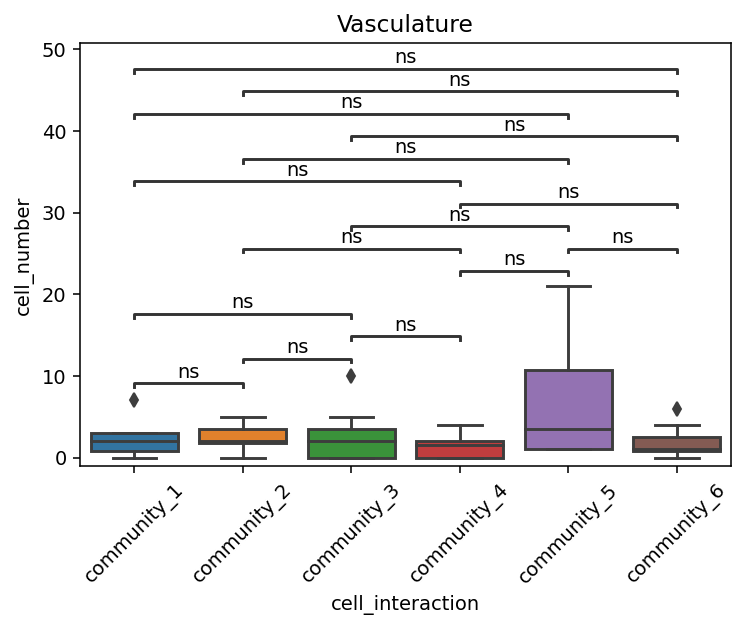

In [50]:
# определяем 'community' где больше 'Vasculature'
ax = sns.boxplot(data=sp_data_1[sp_data_1['cell_type'] == 'Vasculature'], x=x,
                 y=y, order=order)
plt.xticks(rotation=45)
plt.title('Vasculature')


annotator = Annotator(ax, pairs, data=sp_data_1[sp_data_1['cell_type'] ==
                      'Vasculature'], x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

3) Есть ли разница в доле микроокружения в тканях пациентов разных возрастов? Для ответа используйте box_plot/swarplot с hue по возрастным группам, где:

по Ох будут микроокружения,
по Оу — их доля в ткани пациента.
Не забудьте посчитать доли для каждого пациента отдельно, иначе выборка не будет репрезентативной.

In [51]:
age_cell_count = pd.pivot_table(sp_data, 
                index=['age_group', 'case_id'], 
                columns=['cell_interaction'],
                values='index',
                aggfunc=len
                ).fillna(0)

age_cell_count
     

cell_interaction     community_1  community_2  community_3  community_4  \
age_group   case_id                                                       
elder_group 40              7421         7734         8252         3669   
            559             1670         1389         1332          947   
            566             1287         2287         1404         3584   
            891             1044         1619         2265          719   
young_group 199             8318        10530         5593         7626   
            693            13513        12049         1973        38857   
            708             6229         4515         3255         4255   
            983             9034        11359         2613        21312   

cell_interaction     community_5  community_6  
age_group   case_id                            
elder_group 40             13664         9322  
            559             1457         1128  
            566              891         4279  
            891             1617         1561  
young_group 199             7074         4649  
            693             2931          906  
            708             4132         1379  
            983             3115         3683

In [52]:
sp_data_2 = age_cell_count.div(age_cell_count.sum(axis=1), axis=0)
result_sp_data = sp_data_2.reset_index()
result_sp_data

cell_interaction,age_group,case_id,community_1,community_2,community_3,community_4,community_5,community_6
0,elder_group,40,0.148236,0.154488,0.164836,0.073289,0.272942,0.186209
1,elder_group,559,0.210779,0.175312,0.168118,0.119525,0.183895,0.142370
2,elder_group,566,0.093723,0.166545,0.102243,0.260996,0.064885,0.311608
3,elder_group,891,0.118300,0.183456,0.256657,0.081473,0.183229,0.176884
4,young_group,199,0.189952,0.240466,0.127723,0.174149,0.161544,0.106166
5,young_group,693,0.192413,0.171567,0.028094,0.553290,0.041735,0.012901
6,young_group,708,0.262108,0.189985,0.136966,0.179045,0.173869,0.058027
7,young_group,983,0.176735,0.222220,0.051119,0.416934,0.060940,0.072052


In [54]:
community_types = [
                   'community_1', 
                   'community_2',
                   'community_3',
                   'community_4',
                   'community_5',
                   'community_6'
                   ]
     

final_sp_data = pd.melt(result_sp_data, value_vars=community_types, 
                   var_name ='community_type', value_name='community_number', 
                   id_vars='age_group')
final_sp_data

,age_group,community_type,community_number
0,elder_group,community_1,0.148236
1,elder_group,community_1,0.210779
2,elder_group,community_1,0.093723
3,elder_group,community_1,0.118300
4,young_group,community_1,0.189952
5,young_group,community_1,0.192413
6,young_group,community_1,0.262108
7,young_group,community_1,0.176735
8,elder_group,community_2,0.154488
9,elder_group,community_2,0.175312


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

community_2_young_group vs. community_2_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.143e-01 U_stat=1.400e+01
community_1_young_group vs. community_1_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:2.000e-01 U_stat=1.300e+01
community_3_young_group vs. community_3_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.143e-01 U_stat=2.000e+00
community_4_young_group vs. community_4_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.143e-01 U_stat=1.400e+01
community_5_young_group vs. community_5_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.143e-01 U_stat=2.000e+00
community_6_young_group vs. community_6_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:2.857e-02 U_stat=0.000e+00


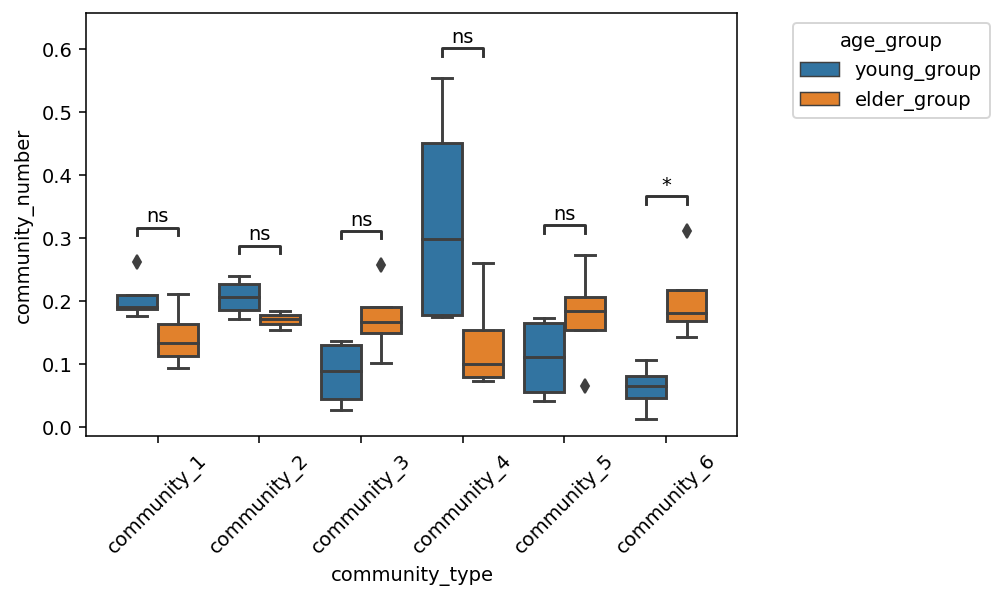

In [55]:
x = 'community_type'
y = 'community_number'
hue = 'age_group'

hue_order = ['young_group', 'elder_group']

pairs = [((com, 'young_group'), (com, 'elder_group'))
                         for com in final_sp_data[x].unique()]

ax = sns.boxplot(data=final_sp_data, x=x, y=y, hue=hue, hue_order=hue_order)
plt.xticks(rotation=45)

annotator = Annotator(ax, pairs, data=final_sp_data, x=x, y=y, 
                      hue_order=hue_order, hue=hue)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.07, 1), title=hue)

**Вывод: Различие наблюдается только в 6 микроокружении.**

4) Правда ли, что иммунные клетки (Immune type 1 и Immune type 2) лежат ближе к сосудам и крупным клеткам (Обе колонки distance), чем стромальные клетки (Stroma cells) у молодых, но не у пожилых пациентов? Эту гипотезу нужно проверить бутстрапом (как разницу средних для двух выборок).

In [56]:
sp_data['distance'] = sp_data['distance_to_largest_cell'] + sp_data['distance_to_vasculature']
     

sp_data_imm = sp_data[(sp_data['cell_type'] == 'Immune type 1') | 
                      (sp_data['cell_type'] == 'Immune type 2')]
sp_data_imm.head()
     

,index,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group,distance
35,35,578.795873,604.065091,28.111050,117.141031,community_2,Immune type 2,891,223,elder_group,1182.860963
36,36,627.113559,636.046148,31.701647,136.872857,community_2,Immune type 2,891,214,elder_group,1263.159707
44,44,576.109024,637.306127,50.650625,350.538476,community_2,Immune type 2,891,221,elder_group,1213.415151
60,60,794.976218,603.989367,15.021383,152.144077,community_3,Immune type 2,891,281,elder_group,1398.965585
63,63,790.529070,1320.641427,14.800876,168.830195,community_1,Immune type 2,891,215,elder_group,2111.170498


In [57]:
sp_data_str = sp_data[sp_data['cell_type'] == 'Stroma cells']
sp_data_str.head()     

,index,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group,distance
0,0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group,1600.585886
1,1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group,1425.639581
2,2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group,1660.919047
6,6,928.607245,707.710208,21.251381,201.072243,community_2,Stroma cells,891,238,elder_group,1636.317453
7,7,663.260477,743.314465,16.802267,123.042648,community_4,Stroma cells,891,254,elder_group,1406.574943


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


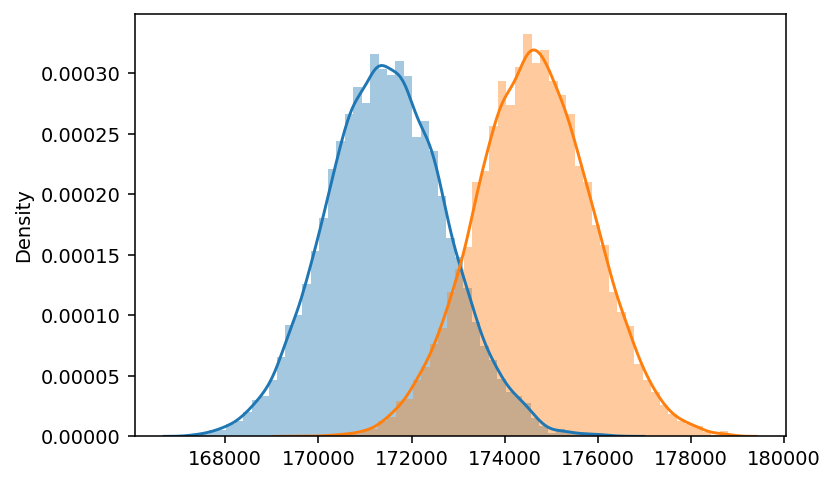

In [60]:
# оцениваем распределение в выборках для правильного выбора теста

sp_data_imm_young = sp_data_imm[sp_data_imm['age_group'] == 'young_group']
sp_data_imm_elder = sp_data_imm[sp_data_imm['age_group'] == 'elder_group']
     

sp_data_str_young = sp_data_str[sp_data_str['age_group'] == 'young_group']
sp_data_str_elder = sp_data_str[sp_data_str['age_group'] == 'elder_group']
     

def my_func(sample):
    mean = np.sum(sample)/len(sample)
    return mean*100
     

results_1 = []
for i in range(10_000):
    sample1 = np.random.choice(sp_data_imm_young['distance'], 500, replace=True)
    results_1.append(my_func(sample1))
     

results_2 = []
for i in range(10_000):
    sample2 = np.random.choice(sp_data_str_young['distance'], 500, replace=True)
    results_2.append(my_func(sample2))
     

sns.distplot(results_1)
sns.distplot(results_2)

**Вывод: распределение в выборках приближено к номальномы, поэтому можно использовать t-тест.**

In [62]:
stats.ttest_ind(results_1, results_2, equal_var=True, alternative='less')

Ttest_indResult(statistic=-176.15622750777771, pvalue=0.0)

**Вывод: Иммунные клетки находяться ближе к сосудам, нежели стромальные в группе молодых пациентов.**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


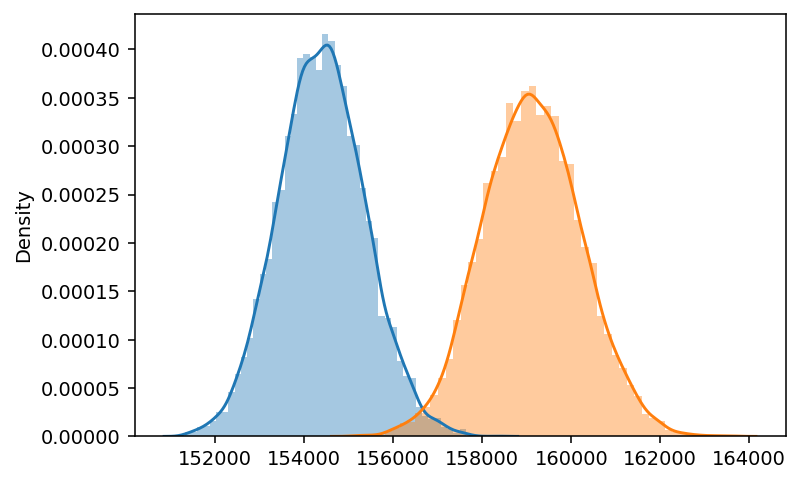

In [63]:
results_3 = []
for i in range(10_000):
    sample3 = np.random.choice(sp_data_imm_elder['distance'], 500, replace=True)
    results_3.append(my_func(sample3))
     

results_4 = []
for i in range(10_000):
    sample4 = np.random.choice(sp_data_str_elder['distance'], 500, replace=True)
    results_4.append(my_func(sample4))
     

sns.distplot(results_3)
sns.distplot(results_4)

**Вывод: распределение также приближено к номальному, можно использовать t- test**

In [64]:
stats.ttest_ind(results_3, results_4, equal_var=True, alternative='less')

Ttest_indResult(statistic=-319.98816341804667, pvalue=0.0)

**Вывод: Расстояние до сосудов меньше у имунных клеток относительно стромальных в группе пожилых.**

5) Правда ли, что иммунные клетки в среднем лежат ближе к сосудам у молодых, но не у пожилых пациентов? Эту гипотезу необходимо проверить пермутационным тестом. В качестве исходной статистики берем массив с расстояниями только для данного типа клеток (длина - n), запоминаем среднее для каждого пациента. На каждой итерации набираем выборку размером n из всей! колонки с расстояниями до сосудов и смотрим соотношение с исходной статистикой. Проверяем гипотезы.

In [ ]:
# не успел((((